## **Import important libraries and read the dataset**

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.manifold import TSNE
plt.rcParams["figure.figsize"] = (10,5)
from sklearn.preprocessing import RobustScaler
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [2]:
import numpy as np

X_train_a = np.loadtxt('01_a_train_data.txt')
y_train_a = np.loadtxt('01_a_train_label.txt', dtype='int64')
    
X_test_a = np.loadtxt('01_a_test_data.txt')
y_test_a = np.loadtxt('01_a_test_label.txt', dtype='int64')
    
X_train_c = np.loadtxt('01_c_train_data.txt')
y_train_c = np.loadtxt('01_c_train_label.txt', dtype='int64')
    
X_test_c = np.loadtxt('01_c_test_data.txt')
y_test_c = np.loadtxt('01_c_test_label.txt', dtype='int64')


X_test = np.loadtxt('01_a_test_data.txt') 
y_test = np.loadtxt('01_a_test_label.txt', dtype='int64')
    
X_train = np.concatenate([X_train_a, X_train_c])
y_train = np.concatenate([y_train_a, y_train_c])


In [3]:
columns_name = ['memory_status_1','memory_status_2','memory_status_3',
                'in_octets_1','in_octets_2','in_octets_3',
                'out_octets_1','out_octets_2','out_octets_3',
               'oper_status_1' ,'oper_status_2','oper_status_3',
                'used_precent_1','used_precent_2','used_precent_3',
                'user_1','user_2','user_3','user_4','user_5','user_6',
                'system_1','system_2','system_3','system_4','system_5','system_6',
                'idle_1','idle_2','idle_3','idle_4','idle_5','idle_6']

In [4]:
X_train = pd.DataFrame(X_train,columns = columns_name)
X_train

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_3,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6
0,0.0,0.0,0.0,2.690996e+09,3.319806e+09,5.962709e+09,3.390005e+09,3.272843e+09,5.785647e+09,0.55,...,1.0000,1.01,0.30,0.9848,0.0,0.49,0.0,0.60,0.0,0.33
1,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.50,...,0.9841,0.20,0.10,0.9950,0.0,0.49,0.0,0.60,0.0,0.33
2,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.40,...,0.9990,1.40,0.20,0.9820,0.0,0.49,0.0,0.60,0.0,0.33
3,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.596000e+03,0.000000e+00,0.50,...,1.0000,1.60,0.40,0.9770,0.0,0.49,0.0,0.60,0.0,0.33
4,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.51,...,0.9927,0.64,0.00,0.9890,0.0,0.49,0.0,0.60,0.0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187015,0.0,0.0,0.0,9.690000e+03,1.174800e+04,2.207400e+04,1.197000e+04,1.010400e+04,2.143800e+04,1.10,...,0.9929,1.31,0.71,0.9747,0.0,0.31,0.0,0.31,0.0,0.31
187016,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.50,...,0.9960,1.38,0.40,0.9822,0.0,0.31,0.0,0.31,0.0,0.31
187017,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.60,...,0.9970,1.11,0.20,0.9869,0.0,0.31,0.0,0.31,0.0,0.31
187018,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.20,...,0.9950,1.39,0.30,0.9831,0.0,0.31,0.0,0.31,0.0,0.31


In [5]:
X_test = pd.DataFrame(X_test,columns = columns_name)
X_test

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_3,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6
0,0.0,0.0,0.0,3.313050e+09,4.094691e+09,7.399217e+09,4.183427e+09,4.022139e+09,7.181872e+09,0.40,...,1.0000,1.10,0.6,0.9801,0.0,0.37,0.0,0.34,0.0,0.32
1,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.818000e+03,0.000000e+00,0.49,...,0.9930,0.90,0.1,0.9880,0.0,0.37,0.0,0.34,0.0,0.32
2,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554000e+03,0.000000e+00,0.10,...,1.0000,1.11,0.4,0.9819,0.0,0.37,0.0,0.34,0.0,0.32
3,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.81,...,0.9990,1.50,0.2,0.9800,0.0,0.37,0.0,0.34,0.0,0.32
4,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.90,...,1.0000,1.11,0.2,0.9839,0.0,0.37,0.0,0.34,0.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23355,0.0,0.0,0.0,1.552600e+04,1.843200e+04,3.530400e+04,1.920000e+04,1.795400e+04,3.395800e+04,1.22,...,0.9692,0.89,0.3,0.9881,0.0,0.39,0.0,0.44,0.0,0.32
23356,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.40,...,0.9900,0.70,0.2,0.9910,0.0,0.39,0.0,0.44,0.0,0.32
23357,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554000e+03,0.000000e+00,0.10,...,0.9950,1.50,0.3,0.9820,0.0,0.39,0.0,0.44,0.0,0.32
23358,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.892000e+03,0.000000e+00,0.00,...,0.9900,0.60,0.2,0.9920,0.0,0.39,0.0,0.44,0.0,0.32


In [6]:
train_label = pd.DataFrame(y_train)
train_label.rename(columns={0:'label'},inplace=True)
train_features=X_train.copy()

In [7]:
test_label = pd.DataFrame(y_test)
test_label.rename(columns={0:'label'},inplace=True)
test_features=X_test.copy()

In [8]:
df_train = pd.concat([train_features, train_label], axis=1)
df_train

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6,label
0,0.0,0.0,0.0,2.690996e+09,3.319806e+09,5.962709e+09,3.390005e+09,3.272843e+09,5.785647e+09,0.55,...,1.01,0.30,0.9848,0.0,0.49,0.0,0.60,0.0,0.33,0
1,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.50,...,0.20,0.10,0.9950,0.0,0.49,0.0,0.60,0.0,0.33,0
2,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.40,...,1.40,0.20,0.9820,0.0,0.49,0.0,0.60,0.0,0.33,0
3,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.596000e+03,0.000000e+00,0.50,...,1.60,0.40,0.9770,0.0,0.49,0.0,0.60,0.0,0.33,0
4,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.51,...,0.64,0.00,0.9890,0.0,0.49,0.0,0.60,0.0,0.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187015,0.0,0.0,0.0,9.690000e+03,1.174800e+04,2.207400e+04,1.197000e+04,1.010400e+04,2.143800e+04,1.10,...,1.31,0.71,0.9747,0.0,0.31,0.0,0.31,0.0,0.31,0
187016,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.50,...,1.38,0.40,0.9822,0.0,0.31,0.0,0.31,0.0,0.31,0
187017,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.60,...,1.11,0.20,0.9869,0.0,0.31,0.0,0.31,0.0,0.31,0
187018,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.20,...,1.39,0.30,0.9831,0.0,0.31,0.0,0.31,0.0,0.31,0


In [9]:
df_test = pd.concat([test_features, test_label], axis=1)
df_test

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6,label
0,0.0,0.0,0.0,3.313050e+09,4.094691e+09,7.399217e+09,4.183427e+09,4.022139e+09,7.181872e+09,0.40,...,1.10,0.6,0.9801,0.0,0.37,0.0,0.34,0.0,0.32,0
1,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.818000e+03,0.000000e+00,0.49,...,0.90,0.1,0.9880,0.0,0.37,0.0,0.34,0.0,0.32,0
2,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554000e+03,0.000000e+00,0.10,...,1.11,0.4,0.9819,0.0,0.37,0.0,0.34,0.0,0.32,0
3,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+03,0.000000e+00,0.81,...,1.50,0.2,0.9800,0.0,0.37,0.0,0.34,0.0,0.32,0
4,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.90,...,1.11,0.2,0.9839,0.0,0.37,0.0,0.34,0.0,0.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23355,0.0,0.0,0.0,1.552600e+04,1.843200e+04,3.530400e+04,1.920000e+04,1.795400e+04,3.395800e+04,1.22,...,0.89,0.3,0.9881,0.0,0.39,0.0,0.44,0.0,0.32,0
23356,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e+03,0.000000e+00,0.40,...,0.70,0.2,0.9910,0.0,0.39,0.0,0.44,0.0,0.32,0
23357,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554000e+03,0.000000e+00,0.10,...,1.50,0.3,0.9820,0.0,0.39,0.0,0.44,0.0,0.32,0
23358,0.0,0.0,0.0,0.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.892000e+03,0.000000e+00,0.00,...,0.60,0.2,0.9920,0.0,0.39,0.0,0.44,0.0,0.32,0


In [10]:
train_df_except_zero_label = df_train[df_train['label'] != 0]
train_df_except_zero_label.label.value_counts()

1    2456
5    2355
4    2329
3    2280
2    2261
Name: label, dtype: int64

In [11]:
test_df_except_zero_label = df_test[df_test['label'] != 0]
test_df_except_zero_label.label.value_counts()

1    308
5    294
4    291
2    287
3    280
Name: label, dtype: int64

In [12]:
train_df_except_zero_label

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6,label
40,0.0,0.0,0.0,81458.0,104043.0,192698.0,107881.0,90081.0,185233.0,25.99,...,1.77,0.99,0.9713,0.0,0.42,0.0,0.64,0.0,0.31,5
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1554.0,0.0,25.99,...,1.09,0.30,0.9861,0.0,0.42,0.0,0.64,0.0,0.31,5
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1850.0,0.0,26.25,...,1.49,0.30,0.9821,0.0,0.42,0.0,0.64,0.0,0.31,5
43,0.0,0.0,0.0,0.0,42.0,0.0,0.0,1818.0,0.0,25.15,...,0.70,0.20,0.9910,0.0,0.42,0.0,0.64,0.0,0.31,5
44,0.0,0.0,0.0,22030.0,28145.0,52112.0,29160.0,24514.0,50090.0,26.80,...,1.81,0.60,0.9749,0.0,0.42,0.0,0.64,0.0,0.31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186962,0.0,0.0,0.0,30841.0,38295.0,67864.0,36763.0,31101.0,69136.0,0.60,...,1.19,0.10,0.9872,0.0,0.31,0.0,0.31,0.0,0.31,5
186963,0.0,0.0,0.0,9756.0,12354.0,21888.0,11706.0,10182.0,22110.0,1.20,...,1.43,0.31,0.9826,0.0,0.31,0.0,0.31,0.0,0.31,5
186964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91,...,1.10,0.40,0.9851,0.0,0.31,0.0,0.31,0.0,0.31,5
186965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,...,1.10,0.20,0.9859,0.0,0.31,0.0,0.31,0.0,0.31,5


In [13]:
test_df_except_zero_label

,memory_status_1,memory_status_2,memory_status_3,in_octets_1,in_octets_2,in_octets_3,out_octets_1,out_octets_2,out_octets_3,oper_status_1,...,system_4,system_5,system_6,idle_1,idle_2,idle_3,idle_4,idle_5,idle_6,label
40,0.0,0.0,0.0,83018.0,104030.0,192511.0,107689.0,90002.0,187048.0,2.01,...,1.92,1.01,0.9688,0.0,0.30,0.0,0.89,0.0,0.31,4
41,0.0,0.0,0.0,0.0,42.0,0.0,0.0,1818.0,0.0,0.60,...,0.50,0.30,0.9900,0.0,0.30,0.0,0.89,0.0,0.31,4
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1554.0,0.0,0.60,...,1.40,0.30,0.9830,0.0,0.30,0.0,0.89,0.0,0.31,4
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1850.0,0.0,0.92,...,1.50,0.40,0.9810,0.0,0.30,0.0,0.89,0.0,0.31,4
44,0.0,0.0,0.0,18778.0,23909.0,44337.0,24774.0,21347.0,42687.0,2.32,...,2.13,0.71,0.9706,0.0,0.30,0.0,0.90,0.0,0.31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,0.0,0.0,0.0,21753.0,27248.0,49202.0,26652.0,27772.0,48959.0,1.21,...,1.90,0.80,0.9711,0.0,0.39,0.0,0.43,1.0,0.96,4
23311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1776.0,0.0,0.60,...,1.10,0.30,0.9850,0.0,0.39,0.0,0.43,1.0,0.96,4
23312,0.0,0.0,0.0,44891.0,53951.0,103335.0,57049.0,47840.0,98842.0,3.00,...,2.60,1.50,0.9560,0.0,0.39,0.0,0.43,1.0,0.97,4
23313,0.0,0.0,0.0,6504.0,7988.0,14762.0,7980.0,8632.0,14492.0,0.51,...,1.21,0.80,0.9789,0.0,0.39,0.0,0.43,1.0,0.97,4


### **Final xtrain ,ytrain ,xtest, ytest**

In [14]:
final_y_train=train_df_except_zero_label.iloc[:,-1]
final_y_train=pd.DataFrame(final_y_train)
final_y_train

,label
40,5
41,5
42,5
43,5
44,5
...,...
186962,5
186963,5
186964,5
186965,5


In [15]:
final_y_test=test_df_except_zero_label.iloc[:,-1]
final_y_test=pd.DataFrame(final_y_test)
final_y_test

,label
40,4
41,4
42,4
43,4
44,4
...,...
23310,4
23311,4
23312,4
23313,4


In [16]:
final_y_train.value_counts()

label
1        2456
5        2355
4        2329
3        2280
2        2261
dtype: int64

In [17]:
final_y_test.value_counts()

label
1        308
5        294
4        291
2        287
3        280
dtype: int64

In [18]:
train_df_except_zero_label.drop(columns=['label'], inplace=True)

In [19]:
test_df_except_zero_label.drop(columns=['label'], inplace=True)

## **Plot the data samples**

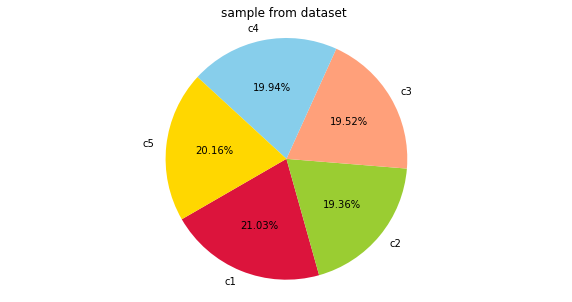

In [20]:
# Data to plot
labels = [ 'c1', 'c2', 'c3', 'c4', 'c5']
sizes = [ 2456, 2261, 2280,2329,2355]
colors = ['#DC143C', '#9ACD32', '#FFA07A', '#87CEEB', '#FFD700', '#8B008B']

# Plot the pie chart

plt.pie(sizes, labels=labels, colors=colors, 
        autopct=lambda p: '{:.2f}%'.format(p) if p > .03 else '', startangle=210)
plt.title('sample from dataset ')
plt.axis('equal')
plt.show()


## **Apply minmaxscaller**

In [21]:
scaler = MinMaxScaler()
train_features_scaled=scaler.fit_transform(train_df_except_zero_label)###X_train after scalling that will use it in ur task  
test_features_scaled=scaler.transform(test_df_except_zero_label)###X_train after scalling that will use it in ur task  


In [22]:
test_features_scaled.shape

(1460, 33)

In [23]:
train_features_scaled.shape

(11681, 33)

In [24]:
train_features_scaled=pd.DataFrame(train_features_scaled,columns=scaler.get_feature_names_out())

In [25]:
test_features_scaled=pd.DataFrame(test_features_scaled,columns=scaler.get_feature_names_out())

In [26]:
final_y_train.reset_index(inplace=True)
final_y_test.reset_index(inplace=True)

In [27]:
del final_y_train['index']
del final_y_test['index']

In [28]:
final_y_train

,label
0,5
1,5
2,5
3,5
4,5
...,...
11676,5
11677,5
11678,5
11679,5


## **Make helper functions**

In [29]:
def mapped_data(x_featues_array_tr,y_array_tr,x_featues_array_ts,y_array_ts):
    # Map the true labels and predicted labels train
  true_map_tr = []
  pred_map_tr= []
  for xi, yi, yi_pred in zip(x_featues_array_tr,y_array_tr, predictions_tr):
      true_map_tr.append(yi)
      pred_map_tr.append(yi_pred)
     # Map the true labels and predicted labels test
  true_map_ts = []
  pred_map_ts= []
  for xi, yi, yi_pred in zip(x_featues_array_ts,y_array_ts, predictions_ts):
      true_map_ts.append(yi)
      pred_map_ts.append(yi_pred)     
  

  return true_map_tr,pred_map_tr,true_map_ts,pred_map_ts


In [30]:
def distribution_fun(true_map_tr,pred_map_tr,true_map_ts,pred_map_ts):
                    
  # create a Pandas DataFrame with the class labels and predicted labels
  df_1 = pd.DataFrame({'true': true_map_tr, 'pred': pred_map_tr})
  df_1['true'] = df_1['true'].apply(lambda x: x[0])
  # group the DataFrame by the class labels and predicted labels, and count the values for each group
  counts = df_1.groupby(['true', 'pred']).size().reset_index(name='count')

  # pivot the counts to get the distribution of the predicted labels for each class
  pivoted = counts.pivot(index='true', columns='pred', values='count')

  # fill any missing values with 0
  pivoted = pivoted.fillna(0)

  # convert the values to integers
  pivoted = pivoted.astype(int)

  # create a new DataFrame with the pivoted table
  result_df_1 = pd.DataFrame(pivoted)


  #######################
 
    # create a Pandas DataFrame with the class labels and predicted labels
  df_3 = pd.DataFrame({'true': true_map_ts, 'pred': pred_map_ts})
  df_3['true'] = df_3['true'].apply(lambda x: x[0])
  # group the DataFrame by the class labels and predicted labels, and count the values for each group
  counts3 = df_3.groupby(['true', 'pred']).size().reset_index(name='count')

  # pivot the counts to get the distribution of the predicted labels for each class
  pivoted3 = counts3.pivot(index='true', columns='pred', values='count')

  # fill any missing values with 0
  pivoted3 = pivoted3.fillna(0)

  # convert the values to integers
  pivoted3 = pivoted3.astype(int)

  # create a new DataFrame with the pivoted table
  result_df_3 = pd.DataFrame(pivoted3)

  return result_df_1,result_df_3

In [31]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score

def eval_kapp_silhoutte(x_featues_array,true_map,pred_map):
  kappa = cohen_kappa_score(true_map, pred_map)
  si=silhouette_score(x_featues_array,pred_map)
  print("kappa score equal : ",kappa)
  print("silhouette_score equal : ",si)
  pass  

In [32]:
import numpy as np
def count_clusters(pred, true):
    # Convert the labels to numpy arrays
    pred = np.array(pred)
    true = np.array(true)

    # Find the unique elements in the predicted labels
    unique_pred = np.unique(pred)

    # Initialize the counters for pure and impure clusters
    pure_clusters = 0
    impure_clusters = 0

    # Iterate over the unique elements in the predicted labels
    for i in unique_pred:
        # Find the true labels corresponding to the current predicted label
        labels = true[pred == i]
        # If all the true labels are the same, it is a pure cluster
        if len(np.unique(labels)) == 1:
            pure_clusters += 1
        # Otherwise, it is an impure cluster
        else:
            impure_clusters += 1
    
    return pure_clusters, impure_clusters



## **TSNE Plot for train and test**

In [33]:
X_reduced_tr = TSNE(n_components=2).fit_transform(train_features_scaled)
X_reduced_ts= TSNE(n_components=2).fit_transform(test_features_scaled)

In [34]:
type(final_y_train)

pandas.core.frame.DataFrame

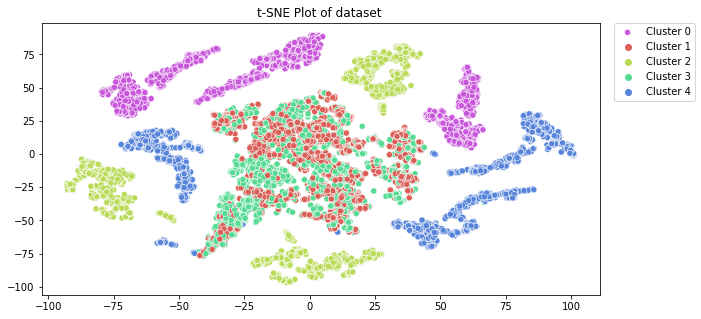

In [185]:
###visualization tsne on the original data using tsne
# Reduce the data to 2 dimensions using t-SNE train with prediction of train
sns.scatterplot(x=X_reduced_tr[:, 0], y=X_reduced_tr[:, 1], hue=final_y_train['label'],palette=sns.color_palette("hls", 5))
# Add a title
plt.title("t-SNE Plot of dataset ")
# Create a legend
labels = ["Cluster {}".format(i) for i in range(5)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()



In [ ]:
###visualization tsne on the original data using tsne
# Reduce the data to 2 dimensions using t-SNE train with prediction of train
sns.scatterplot(x=X_reduced_ts[:, 0], y=X_reduced_ts[:, 1], hue=final_y_tra['label'],palette=sns.color_palette("hls", 5))
# Add a title
plt.title("t-SNE Plot of dataset ")
# Create a legend
labels = ["Cluster {}".format(i) for i in range(5)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()


## **Apply Ward limkage**

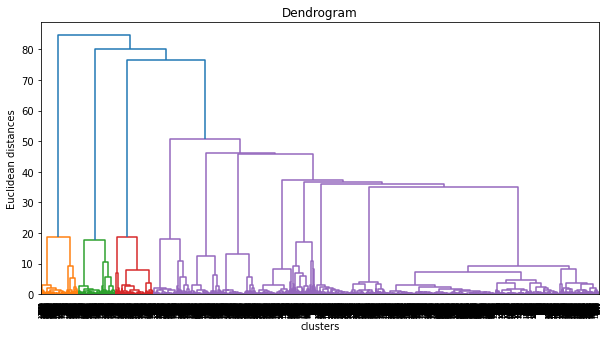

In [35]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(train_features_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('clusters')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'silhouette_score')

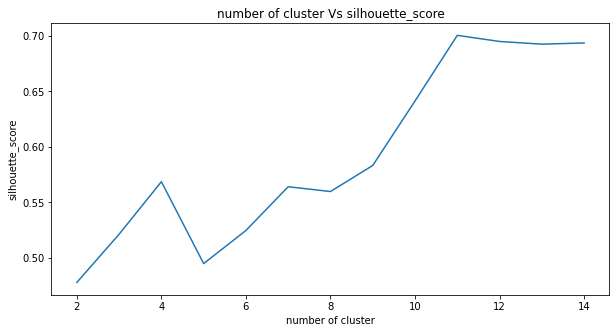

In [38]:
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import AgglomerativeClustering

scores = []
for i in range(2,15):
  clustering = AgglomerativeClustering(n_clusters=i, linkage='ward')  
  y_pred = clustering.fit_predict(train_features_scaled)
  if len(np.unique(clustering.labels_))>=2 :  
      scores.append(silhouette_score(train_features_scaled,y_pred))
  else:
      continue
        
plt.plot(range(2,15),scores)
plt.title('number of cluster Vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

In [85]:
#implement aggrumulative with n_clusters=4,linkage='ward'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# Cluster the data using Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=11,linkage='ward')
predictions_tr = cluster.fit_predict(train_features_scaled)
predictions_ts=cluster.fit_predict(test_features_scaled)

In [86]:
###make all data as array tobe mapped 
x_featues_array_tr= train_features_scaled.values
y_array_tr=final_y_train.values

x_featues_array_ts= test_features_scaled.values
y_array_ts=final_y_test.values


In [87]:
true_map_tr,pred_map_tr,true_map_ts,pred_map_ts=mapped_data(x_featues_array_tr,y_array_tr,x_featues_array_ts,y_array_ts)

In [88]:
conf_tr,conf_ts=distribution_fun(true_map_tr,pred_map_tr,true_map_ts,pred_map_ts)

In [96]:
np.unique(predictions_tr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [97]:
np.unique(predictions_ts)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [89]:
conf_tr

pred,0,1,2,3,4,5,6,7,8,9,10
true,,,,,,,,,,,
1,0,0,0,143,0,0,0,0,2313,0,0
2,0,0,0,72,0,0,0,752,0,729,708
3,0,0,0,188,0,0,1,0,2089,0,2
4,0,0,0,91,765,667,726,0,80,0,0
5,787,787,781,0,0,0,0,0,0,0,0


In [90]:
conf_ts

pred,0,1,2,3,4,5,6,7,8,9,10
true,,,,,,,,,,,
1,0,0,0,0,22,0,0,0,0,0,286
2,0,0,0,0,8,0,0,98,92,89,0
3,0,0,0,0,50,0,0,0,0,0,230
4,0,97,93,0,4,0,91,0,0,0,6
5,98,0,0,99,0,97,0,0,0,0,0


In [94]:
###evalution for  train
eval_kapp_silhoutte(x_featues_array_tr,true_map_tr,pred_map_tr)

kappa score equal :  0.023033679930384743
silhouette_score equal :  0.7005552015268813


In [95]:
###evalution for  test
eval_kapp_silhoutte(x_featues_array_ts,true_map_ts,pred_map_ts)

kappa score equal :  0.005119961330778855
silhouette_score equal :  0.6313460222782846


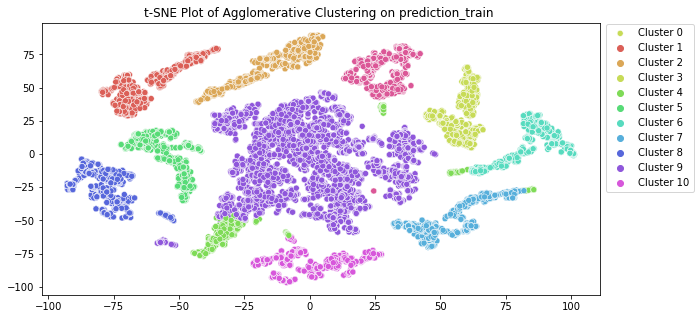

In [99]:
# Reduce the data to 2 dimensions using t-SNE train with prediction of train
sns.scatterplot(x=X_reduced_tr[:, 0], y=X_reduced_tr[:, 1], hue=predictions_tr,palette=sns.color_palette("hls", 11))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with ward linkage on prediction_train ")
# Create a legend
labels = ["Cluster {}".format(i) for i in range(11)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.1)
plt.show()

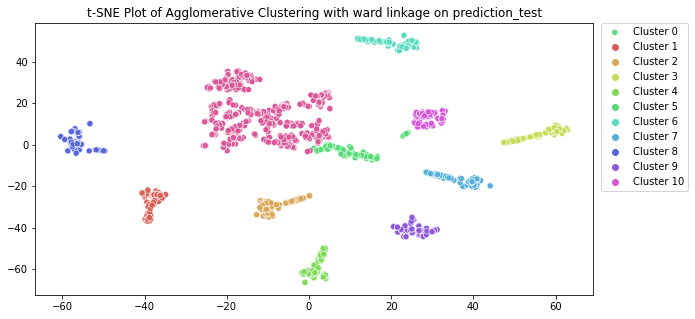

In [100]:
# Reduce the data to 2 dimensions using t-SNE
sns.scatterplot(x=X_reduced_ts[:, 0], y=X_reduced_ts[:, 1], hue=predictions_ts,palette=sns.color_palette("hls", 11))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with ward linkage on prediction_test")

# Create a legend
labels = ["Cluster {}".format(i) for i in range(11)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()

## **Apply Average linkage**

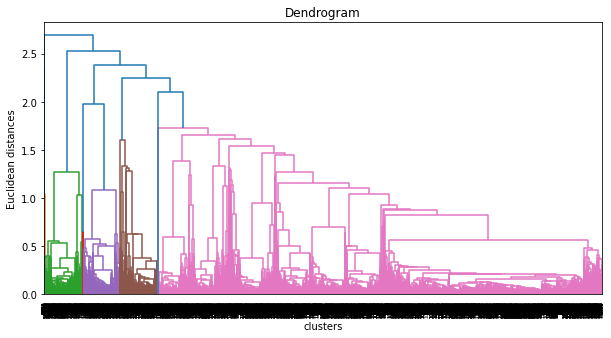

In [101]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(train_features_scaled, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('clusters')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'silhouette_score')

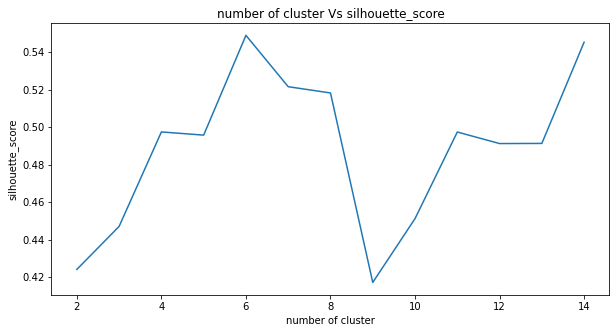

In [102]:
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import AgglomerativeClustering

scores = []
for i in range(2,15):
  clustering = AgglomerativeClustering(n_clusters=i, linkage='average')  
  y_pred = clustering.fit_predict(train_features_scaled)
  if len(np.unique(clustering.labels_))>=2 :  
      scores.append(silhouette_score(train_features_scaled,y_pred))
  else:
      continue
        
plt.plot(range(2,15),scores)
plt.title('number of cluster Vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

In [119]:
#implement aggrumulative with avg
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# Cluster the data using Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=6,linkage='average')
predictions_tr = cluster.fit_predict(train_features_scaled)
predictions_ts=cluster.fit_predict(test_features_scaled)

In [120]:
###make all data as array tobe mapped 
x_featues_array_tr= train_features_scaled.values
y_array_tr=final_y_train.values

x_featues_array_ts= test_features_scaled.values
y_array_ts=final_y_test.values


In [121]:
true_map_tr,pred_map_tr,true_map_ts,pred_map_ts=mapped_data(x_featues_array_tr,y_array_tr,x_featues_array_ts,y_array_ts)

In [122]:
conf_tr,conf_ts=distribution_fun(true_map_tr,pred_map_tr,true_map_ts,pred_map_ts)

In [123]:
conf_tr

pred,0,1,2,3,4,5
true,,,,,,
1,2456,0,0,0,0,0
2,2261,0,0,0,0,0
3,2279,0,0,0,1,0
4,2307,0,0,22,0,0
5,0,781,787,0,0,787


In [124]:
conf_ts

pred,0,1,2,3,4,5
true,,,,,,
1,297,0,11,0,0,0
2,274,0,13,0,0,0
3,265,0,15,0,0,0
4,270,0,21,0,0,0
5,0,98,0,89,10,97


In [125]:
##evalution on train
eval_kapp_silhoutte(x_featues_array_tr,true_map_tr,pred_map_tr)

kappa score equal :  0.027434008672299504
silhouette_score equal :  0.5489052283868167


In [126]:
##evalution on train
eval_kapp_silhoutte(x_featues_array_ts,true_map_ts,pred_map_ts)

kappa score equal :  0.028033659327523552
silhouette_score equal :  0.45666158243021304


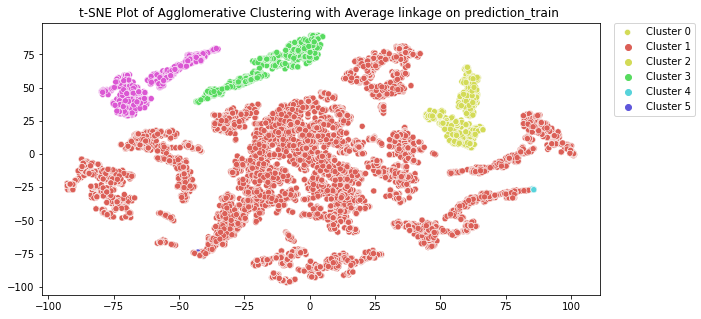

In [111]:
# Reduce the data to 2 dimensions using t-SNE train with prediction of train
sns.scatterplot(x=X_reduced_tr[:, 0], y=X_reduced_tr[:, 1], hue=predictions_tr,palette=sns.color_palette("hls", 6))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with Average linkage on prediction_train ")
# Create a legend
labels = ["Cluster {}".format(i) for i in range(6)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()

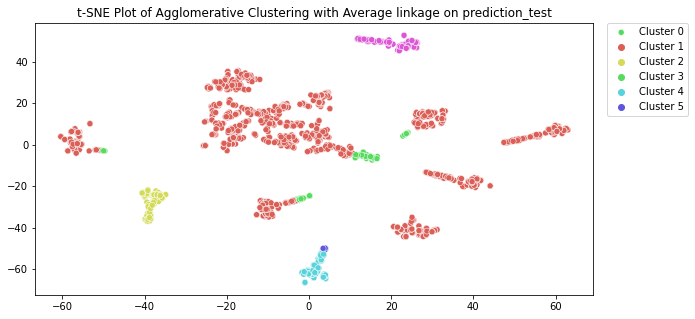

In [112]:
# Reduce the data to 2 dimensions using t-SNE
sns.scatterplot(x=X_reduced_ts[:, 0], y=X_reduced_ts[:, 1], hue=predictions_ts,palette=sns.color_palette("hls", 6))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with Average linkage on prediction_test")

# Create a legend
labels = ["Cluster {}".format(i) for i in range(6)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()

## **The final result with tunning agrrumulative with kappa score**

In [113]:
x = train_features_scaled.values
y=final_y_train.values


Text(0, 0.5, 'kappa score')

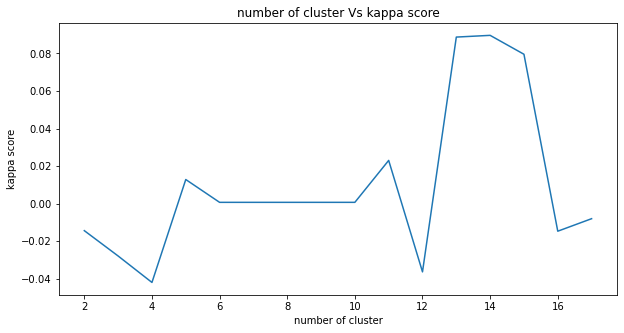

In [157]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
from sklearn.cluster import AgglomerativeClustering

scores = []
for i in range(2,18):
    clustering = AgglomerativeClustering(n_clusters=i, linkage='ward')  
    y_pred = clustering.fit_predict(x)
    if len(np.unique(clustering.labels_))>=2 :
        # Map the true labels and predicted labels
        true = []
        pred = []
        for xi, yi, yi_pred in zip(x,y, y_pred):
            true.append(yi)
            pred.append(yi_pred)
        # Calculate the Kappa statistic
        kappa = cohen_kappa_score(true, pred)
        scores.append(kappa)
    else:
        continue
        
plt.plot(range(2,18),scores)
plt.title('number of cluster Vs kappa score')
plt.xlabel('number of cluster')
plt.ylabel('kappa score')


## **Final results**

In [158]:
#implement aggrumulative with avg
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# Cluster the data using Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=14,linkage='ward')
predictions_tr = cluster.fit_predict(train_features_scaled)
predictions_ts=cluster.fit_predict(test_features_scaled)

In [159]:
###make all data as array tobe mapped 
x_featues_array_tr= train_features_scaled.values
y_array_tr=final_y_train.values

x_featues_array_ts= test_features_scaled.values
y_array_ts=final_y_test.values


In [160]:
true_map_tr,pred_map_tr,true_map_ts,pred_map_ts=mapped_data(x_featues_array_tr,y_array_tr,x_featues_array_ts,y_array_ts)

In [161]:
conf_tr,conf_ts=distribution_fun(true_map_tr,pred_map_tr,true_map_ts,pred_map_ts)

In [162]:
conf_tr

pred,0,1,2,3,4,5,6,7,8,9,10,11,12,13
true,,,,,,,,,,,,,,
1,0,143,0,2313,0,0,0,0,0,0,0,0,0,0
2,0,72,0,0,0,0,0,752,0,729,708,0,0,0
3,0,188,1,2089,0,0,0,0,0,0,2,0,0,0
4,0,91,726,80,0,667,280,0,0,0,0,0,0,485
5,781,0,0,0,240,0,0,0,661,0,0,547,126,0


In [163]:
conf_ts

pred,0,1,2,3,4,5,6,7,8,9,10,11,12,13
true,,,,,,,,,,,,,,
1,0,0,0,0,22,0,0,0,0,0,286,0,0,0
2,0,0,0,0,8,0,0,98,92,89,0,0,0,0
3,0,0,0,0,50,0,0,0,0,0,230,0,0,0
4,0,97,34,0,4,67,0,0,0,0,6,0,59,24
5,97,0,0,99,0,0,33,0,0,0,0,65,0,0


In [164]:
##Eval for train
eval_kapp_silhoutte(x_featues_array_tr,true_map_tr,pred_map_tr)

kappa score equal :  0.08962612971646455
silhouette_score equal :  0.6936870163744436


In [165]:
##Eval for test
eval_kapp_silhoutte(x_featues_array_ts,true_map_ts,pred_map_ts)

kappa score equal :  -0.052302257705543864
silhouette_score equal :  0.6579188179543324


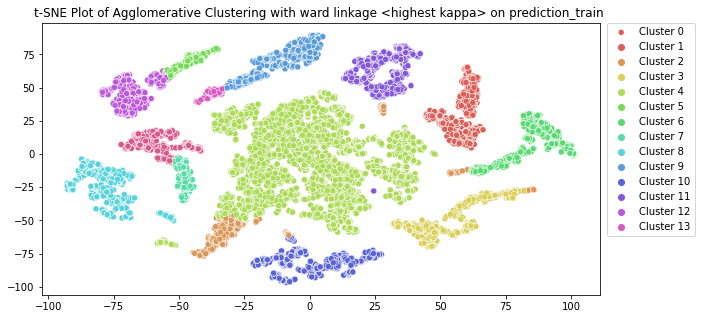

In [166]:
# Reduce the data to 2 dimensions using t-SNE train with prediction of train
sns.scatterplot(x=X_reduced_tr[:, 0], y=X_reduced_tr[:, 1], hue=predictions_tr,palette=sns.color_palette("hls", 14))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with ward linkage <highest kappa> on prediction_train ")
# Create a legend
labels = ["Cluster {}".format(i) for i in range(14)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()

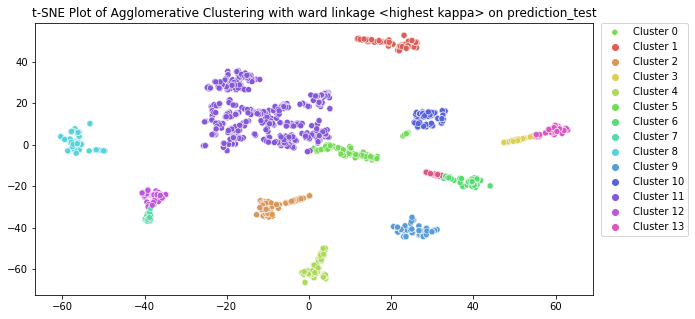

In [167]:
# Reduce the data to 2 dimensions using t-SNE
sns.scatterplot(x=X_reduced_ts[:, 0], y=X_reduced_ts[:, 1], hue=predictions_ts,palette=sns.color_palette("hls", 14))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with ward linkage <highest kappa> on prediction_test")

# Create a legend
labels = ["Cluster {}".format(i) for i in range(14)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()

In [36]:
x = train_features_scaled.values
y=final_y_train.values

Text(0, 0.5, 'kappa score')

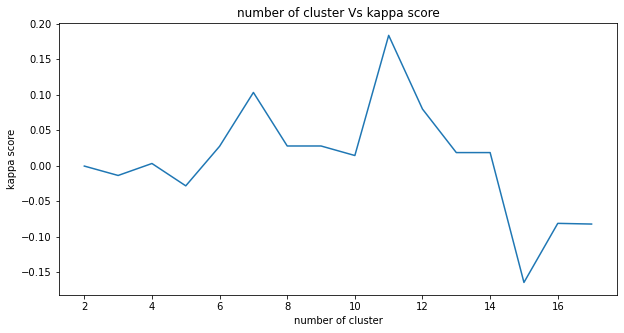

In [37]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
from sklearn.cluster import AgglomerativeClustering

scores = []
for i in range(2,18):
    clustering = AgglomerativeClustering(n_clusters=i, linkage='average')  
    y_pred = clustering.fit_predict(x)
    if len(np.unique(clustering.labels_))>=2 :
        # Map the true labels and predicted labels
        true = []
        pred = []
        for xi, yi, yi_pred in zip(x,y, y_pred):
            true.append(yi)
            pred.append(yi_pred)
        # Calculate the Kappa statistic
        kappa = cohen_kappa_score(true, pred)
        scores.append(kappa)
    else:
        continue
        
plt.plot(range(2,18),scores)
plt.title('number of cluster Vs kappa score')
plt.xlabel('number of cluster')
plt.ylabel('kappa score')


In [38]:
#implement aggrumulative with avg
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# Cluster the data using Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=11,linkage='average')
predictions_tr = cluster.fit_predict(train_features_scaled)
predictions_ts=cluster.fit_predict(test_features_scaled)

In [39]:
###make all data as array tobe mapped 
x_featues_array_tr= train_features_scaled.values
y_array_tr=final_y_train.values

x_featues_array_ts= test_features_scaled.values
y_array_ts=final_y_test.values


In [40]:
true_map_tr,pred_map_tr,true_map_ts,pred_map_ts=mapped_data(x_featues_array_tr,y_array_tr,x_featues_array_ts,y_array_ts)

In [41]:
conf_tr,conf_ts=distribution_fun(true_map_tr,pred_map_tr,true_map_ts,pred_map_ts)

In [42]:
conf_tr

pred,0,1,2,3,4,5,6,7,8,9,10
true,,,,,,,,,,,
1,0,0,2456,0,0,0,0,0,0,0,0
2,0,0,2260,0,0,0,0,0,1,0,0
3,0,0,2278,0,0,0,1,0,0,1,0
4,0,766,826,22,715,0,0,0,0,0,0
5,787,0,0,0,0,787,0,24,0,0,757


In [43]:
conf_ts

pred,0,1,2,3,4,5,6,7,8,9,10
true,,,,,,,,,,,
1,0,0,11,0,0,0,297,0,0,0,0
2,0,0,13,0,0,0,274,0,0,0,0
3,0,0,15,0,0,0,265,0,0,0,0
4,0,93,3,0,22,69,7,0,18,0,79
5,97,0,0,98,0,0,0,89,0,10,0


In [44]:
##Eval for train
eval_kapp_silhoutte(x_featues_array_tr,true_map_tr,pred_map_tr)

kappa score equal :  0.18367283705070292
silhouette_score equal :  0.4973896276666203


In [45]:
##Eval for test
eval_kapp_silhoutte(x_featues_array_ts,true_map_ts,pred_map_ts)

kappa score equal :  -0.02146826304734839
silhouette_score equal :  0.5460933128075122


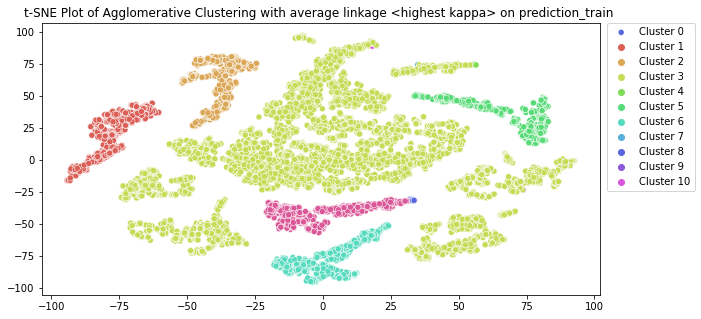

In [48]:
# Reduce the data to 2 dimensions using t-SNE train with prediction of train
sns.scatterplot(x=X_reduced_tr[:, 0], y=X_reduced_tr[:, 1], hue=predictions_tr,palette=sns.color_palette("hls", 11))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with average linkage <highest kappa> on prediction_train ")
# Create a legend
labels = ["Cluster {}".format(i) for i in range(11)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()

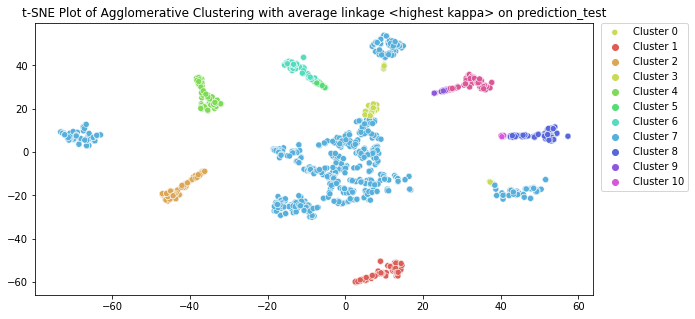

In [49]:
# Reduce the data to 2 dimensions using t-SNE
sns.scatterplot(x=X_reduced_ts[:, 0], y=X_reduced_ts[:, 1], hue=predictions_ts,palette=sns.color_palette("hls", 11))
# Add a title
plt.title("t-SNE Plot of Agglomerative Clustering with average linkage <highest kappa> on prediction_test")

# Create a legend
labels = ["Cluster {}".format(i) for i in range(11)]
plt.legend(labels, bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0.)
plt.show()